In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
import seaborn as sns

%matplotlib inline

## 1 Bagging, boosting, RF

In [7]:
df = pd.read_csv('spam.txt', sep=' ')

In [38]:
df.head() #(4601, 58)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


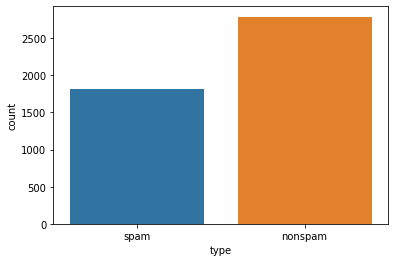

In [40]:
sns.countplot(x='type', data=df);

In [13]:
y = df['type']
X = df.drop('type', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3220, 57) (1381, 57) (3220,) (1381,)


In [31]:
bag_clf = BaggingClassifier() #params : nb d'arbres, profondeur des arbres
bag_clf.fit(X_train, y_train)
print('Bagging accuracy : %.3f' % bag_clf.score(X_test, y_test))

Bagging accuracy : 0.933


In [29]:
gb_clf = GradientBoostingClassifier() #params : nb d'itérations, 
gb_clf.fit(X_train, y_train)
print('Gb accuracy : %.3f' % gb_clf.score(X_test, y_test))

Gb accuracy : 0.948


In [32]:
rf_clf = RandomForestClassifier() #params : nb d'arbres, profondeur des arbres, nb de feature (defaut = sqrt(nb_feature))
rf_clf.fit(X_train, y_train)
print('Rf accuracy : %.3f' % rf_clf.score(X_test, y_test))

Rf accuracy : 0.957


**Parameters tuning**

In [47]:
#Bagging :
params = {
    'n_estimators': [10**i for i in np.arange(0, 4)]    
}
clf = GridSearchCV(
    estimator=BaggingClassifier(n_jobs=-1),
    param_grid=params,
    verbose=1,
    scoring= 'accuracy',
    cv=5
)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=-1,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [48]:
clf.score(X_test, y_test)

0.941346850108617

In [50]:
#Boosting :
# - Params relatifs aux arbres
# - Params relatifs au gbm 
# - Autres params

params = {
    'n_estimators' : [10**i for i in np.arange(1, 4)]
}
gb_clf = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    verbose=1,
    scoring= 'accuracy',
    cv=5
)

gb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [51]:
gb_clf.score(X_test, y_test)

0.9493120926864591

In [53]:
#RF :

params = {
    'n_estimators' : [10**i for i in np.arange(1, 4)],
    'max_features' : ('sqrt', 1), 
    'max_depth' : [1, 5, 10, 100]
}
rf_clf = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    verbose=1,
    scoring= 'accuracy',
    cv=5
)

rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [55]:
rf_clf.score(X_test, y_test)

0.9580014482259233

In [58]:
rf_clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}

In [62]:
best_clf = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000)
best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

''

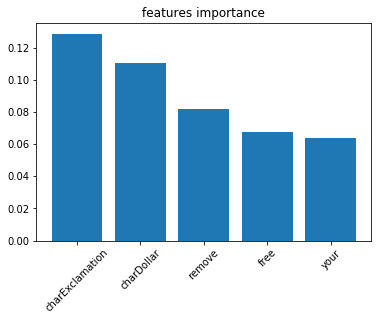

In [120]:
def feature_importance(clf):
    importances = clf.feature_importances_
    df_tmp = pd.concat([pd.Series(importances), pd.Series(X.columns)], axis=1)
    df_tmp = df_tmp.sort_values(0, ascending=False)

    fig, ax = plt.subplots()
    ax.barh(df_tmp.iloc[:5,1], df_tmp.iloc[:5,0])
    #ax.tick_params(axis='x', rotation=45)
    ax.set_title('features importance')
    ;

In [76]:
df.columns

pandas.core.indexes.base.Index

**Conclusion :**

Meilleur classifieur : Random Forest !

Avantages : Bagging & Rf permettent de réduire la variance d'un arbre. Méthode non-paramétrique donc fonctionnent mal en grande dimension. Peu de résultats théoriques pour conforter ces méthodes même si elles fonctionnent bien en pratique. 
-> perte d'interprétabilité pour ces méthodes ensemblistes.

incovénients :
coût de calcul 

**SVM**